In [1]:
import numpy as np
import pandas as pd #For loading the dataset only
from matplotlib import pyplot as plt #For plotting data into image

In [2]:
#load the Dataset from CSV file
full_dataset = pd.read_csv('./mnist_dataset/train.csv')
full_dataset.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
#Convert dataset to numpy array for further calculations
full_dataset = np.array(full_dataset)
np.random.shuffle(full_dataset) #Shuffling the dataset to get random example

In [4]:
def get_X_and_Y(full_dataset, example_2_use, split_ratio ):

    data = full_dataset[:example_2_use, :].T
    Y = data[0]
    X = data[1:,]

    #Normalize the values of X by dividing the maximum value of X so that the values ranges from 0 to 1
    X_normalized = X / 255.

    split_index = int(example_2_use * split_ratio)

    Y_train = Y[: split_index]
    Y_test = Y[split_index : ]

    X_train = X_normalized[:, : split_index]
    X_test = X_normalized[:, split_index :]

    return X_train, Y_train, X_test, Y_test

In [5]:
def initialize_weights_and_bias():
    W1 = np.random.rand(15, 784) - .5
    b1 = np.random.rand(15, 1) - .5

    W2 = np.random.rand(10, 15) - .5
    b2 = np.random.rand(10, 1) - .5

    return W1, b1, W2, b2

In [6]:
def relu(Z):
    return np.maximum(Z, 0)

In [7]:
def softmax(Z):
    return np.exp(Z) / np.sum(np.exp(Z), axis=0)

In [8]:
def forward_propagation(W1, b1, W2, b2, X):
    
    Z1 = np.matmul(W1, X) + b1
    A1 = relu(Z1)
    Z2 = np.matmul(W2, A1) + b2
    A2 = softmax(Z2)

    return Z1, A1, Z2, A2

In [9]:
def one_hot_Y(Y):
    Y_encoded = np.zeros((10, 700), dtype=int)

    for index, val in enumerate(Y):
        Y_encoded[val, index] = 1

    return Y_encoded

In [10]:
def relu_derivative(Z):
    return Z > 0

In [11]:
def backpropagation(Z1, A1, A2, W2, X, Y):
    Y_encoded = one_hot_Y(Y)
    _ , m = Y_encoded.shape

    #Calculation for the output layer
    error = A2 - Y_encoded
    dJ_dW2 = np.matmul(error, A1.T) / m
    dJ_db2 = np.sum(error, axis=1, keepdims=True) / m

    #Calculation for the hidden layer
    dJ_dA1 = np.matmul(W2.T, error)
    dA1_dZ1 = relu_derivative(Z1)
    dJ_dZ1 = dA1_dZ1 * dJ_dA1

    dJ_dW1 = np.matmul(dJ_dZ1, X.T) / m
    dJ_db1 = np.sum(dJ_dZ1, axis=1, keepdims=True) / m

    return dJ_dW1, dJ_db1, dJ_dW2, dJ_db2

In [12]:
def update_weights_and_bias(W1, b1, W2, b2, dJ_dW1, dJ_db1, dJ_dW2, dJ_db2, alpha):
    W1 = W1 - alpha * dJ_dW1
    b1 = b1 - alpha * dJ_db1

    W2 = W2 - alpha * dJ_dW2
    b2 = b2 - alpha * dJ_db2

    return W1, b1, W2, b2

In [13]:
def predict(A2):
    return np.argmax(A2, axis=0)

def calculate_accuracy(prediction, Y):
    return np.sum(prediction == Y) / Y.size

In [14]:
def gradient_descent(X_train, Y_train, iterations, alpha):
    W1, b1, W2, b2 = initialize_weights_and_bias()

    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_propagation(W1, b1, W2, b2, X_train)
        dJ_dW1, dJ_db1, dJ_dW2, dJ_db2 = backpropagation(Z1, A1, A2, W2, X_train, Y_train)
        W1, b1, W2, b2 = update_weights_and_bias(W1, b1, W2, b2, dJ_dW1, dJ_db1, dJ_dW2, dJ_db2, alpha)

        if i%100 == 0:
            print("Iteration: ", i)
            prediction = predict(A2)
            accuracy = calculate_accuracy(prediction, Y_train)
            print("Training Accuracy: ", accuracy)

    return W1, b1, W2, b2

In [15]:
X_train, Y_train, X_test, Y_test = get_X_and_Y(full_dataset, example_2_use=1000, split_ratio=0.7)

W1, b1, W2, b2 = gradient_descent(X_train, Y_train, 1000, .1)

Iteration:  0
Training Accuracy:  0.07428571428571429
Iteration:  100
Training Accuracy:  0.7528571428571429
Iteration:  200
Training Accuracy:  0.8542857142857143
Iteration:  300
Training Accuracy:  0.9057142857142857
Iteration:  400
Training Accuracy:  0.9371428571428572
Iteration:  500
Training Accuracy:  0.9528571428571428
Iteration:  600
Training Accuracy:  0.9685714285714285
Iteration:  700
Training Accuracy:  0.9785714285714285
Iteration:  800
Training Accuracy:  0.9842857142857143
Iteration:  900
Training Accuracy:  0.9857142857142858


In [16]:
def test_set_accuracy(W1, b1, W2, b2, X_test, Y_test):
    _, _, _, A2 = forward_propagation(W1, b1, W2, b2, X_test)
    prediction = predict(A2)
    accuracy = calculate_accuracy(prediction, Y_test)

    return accuracy

test_accuracy = test_set_accuracy(W1, b1, W2, b2, X_test, Y_test)
print("Accuracy on test set: ", test_accuracy)

Accuracy on test set:  0.8433333333333334


In [17]:
def demonstrate_prediction(index, W1, b1, W2, b2, X_test, Y_test):
    X_single = X_test[:, index].reshape(-1,1)
    label = Y_test[index]
    _, _, _, A2 = forward_propagation(W1, b1, W2, b2, X_single)
    prediction = predict(A2)

    print("Prediction: ", prediction.item())
    print("Actual Digit: ", label)

    image = X_single.reshape((28,28)) * 255

    plt.gray()
    plt.imshow(image, interpolation='nearest')
    plt.show()

Prediction:  2
Actual Digit:  2


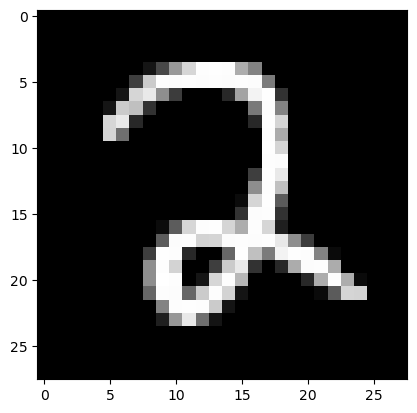

Prediction:  6
Actual Digit:  6


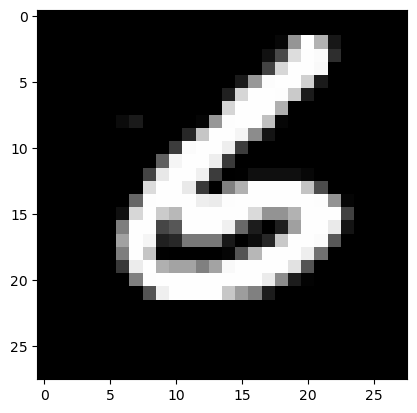

Prediction:  7
Actual Digit:  7


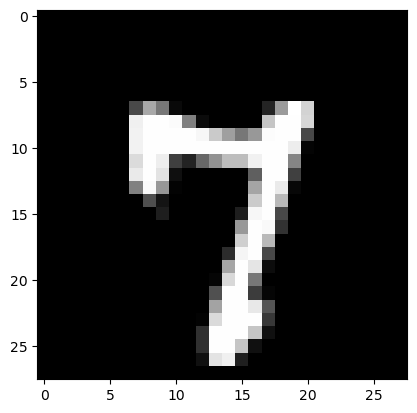

Prediction:  9
Actual Digit:  9


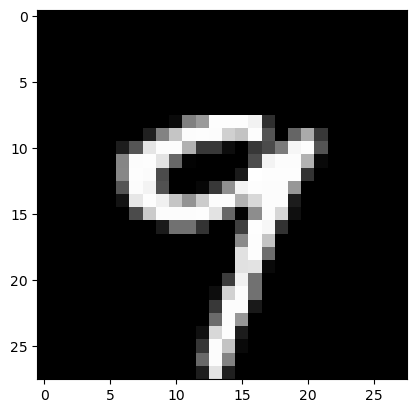

Prediction:  0
Actual Digit:  0


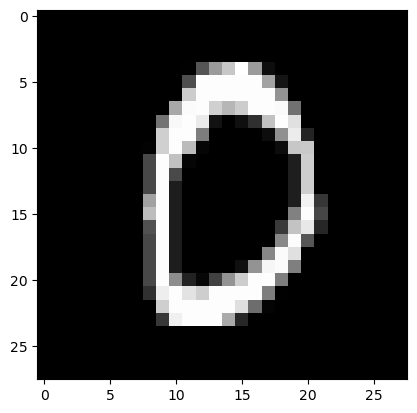

In [23]:
demonstrate_prediction(233, W1, b1, W2, b2, X_test, Y_test)
demonstrate_prediction(68, W1, b1, W2, b2, X_test, Y_test)
demonstrate_prediction(87, W1, b1, W2, b2, X_test, Y_test)
demonstrate_prediction(84, W1, b1, W2, b2, X_test, Y_test)
demonstrate_prediction(298, W1, b1, W2, b2, X_test, Y_test)